[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figure 12.9 and 12.16

Illustration of ordinary least squares and ridge regression for a simple example with two features, where the response is a linear function of the features corrupted by additive noise\
Topics: Linear regression, ordinary least squares, ridge regression, regularization

Author: Carlos Fernandez-Granda

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
font_size = 15
font_size_ticks = 15
np.set_printoptions(precision=3)

xmin = -3
xmax = 3
ymin = -3
ymax = 3
beta_min = -0.05
beta_max = 1.8
x_grid = np.linspace(xmin, xmax, 200)
sigma = 0.2

reps = 100
msize = 50


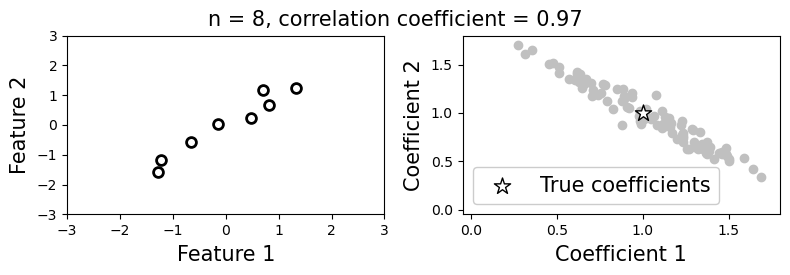

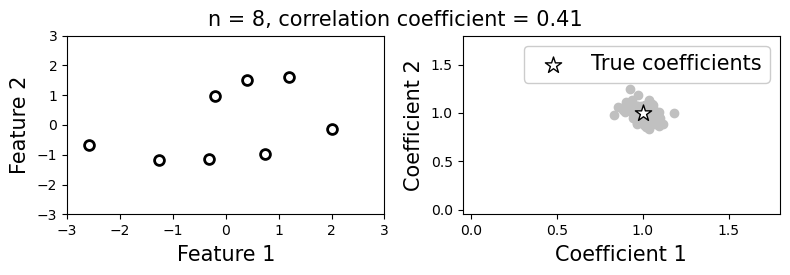

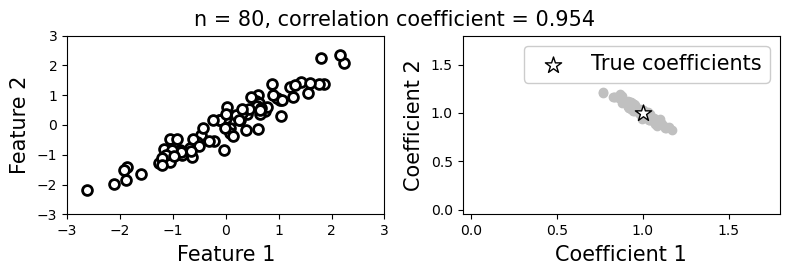

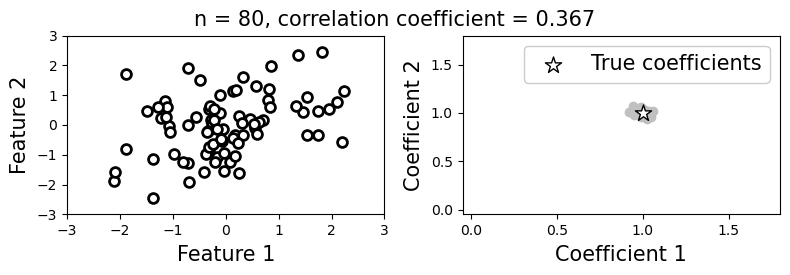

In [8]:
# Influence of feature correlation and number of data on the ordinary-least-squares estimator 
rng = default_rng(2023)

tick_aux = np.arange(0,2,0.5)

n_vals = [8,80]
rho_vals = np.array([0.95,0.5])

true_beta = np.array([1,1])

for ind_n,n in enumerate(n_vals):

    for ind_rho,rho in enumerate(rho_vals): 
        cov_matrix = np.array([[1,rho],[rho,1]])
        eigvals_cov,eigvecs_cov = np.linalg.eig(cov_matrix)
        coloring_matrix = eigvecs_cov @ np.diag(np.sqrt(eigvals_cov)) 
        iid_gaussian = rng.standard_normal(size=(2,n))
        X_raw = coloring_matrix @ iid_gaussian 
        X = X_raw - X_raw.mean(axis=1, keepdims=True)

        if ind_rho == 0 and ind_n == 0:
            X_multicollinearity = X

        fig, axes = plt.subplots(1, 2, figsize=(8,3),width_ratios=[1,1])
        fig.suptitle("n = " + str(n) + ", correlation coefficient = " + str(np.round(np.corrcoef(X)[0,1],3)),fontsize=font_size,y = 0.9)
        
        axes[0].scatter(X[0,:],X[1,:],s=msize,color="white",edgecolor='black',lw=2, rasterized=True)
        axes[0].set_ylim([ymin,ymax])
        axes[0].set_xlim([xmin,xmax])
        axes[0].set_xlabel('Feature 1',fontsize=font_size,labelpad = 5)
        axes[0].set_ylabel('Feature 2',fontsize=font_size,labelpad = 5)
        
        betas = np.zeros((reps,2))

        for ind in range(reps):

            z = sigma * rng.standard_normal(n)
            y = X.T @ true_beta + z
            
            linear_model = LinearRegression(fit_intercept=False).fit(X.T, y)

            betas[ind,:] = linear_model.coef_

        axes[1].scatter(betas[:,0],betas[:,1],s=msize/2,color="silver",edgecolor='silver',lw=2, rasterized=True)
        axes[1].scatter(true_beta[0],true_beta[1],s=3*msize,color="white",edgecolor='black',lw=1,marker="*", label="True coefficients")
        axes[1].set_xticks(tick_aux) 
        axes[1].set_yticks(tick_aux)
        axes[1].set_ylim([beta_min,beta_max])
        axes[1].set_xlim([beta_min,beta_max])
        axes[1].set_xlabel('Coefficient 1',fontsize=font_size,labelpad = 5)
        axes[1].set_ylabel('Coefficient 2',fontsize=font_size,labelpad = 5)
        axes[1].legend(fontsize=font_size,framealpha=1)
        plt.tight_layout();

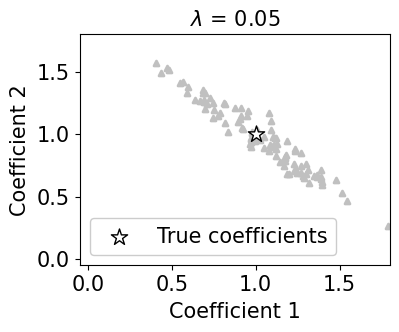

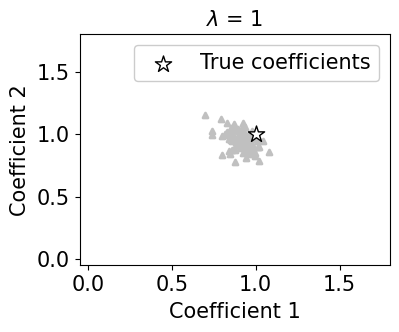

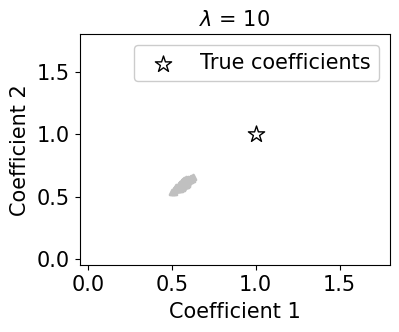

In [9]:
# Influence of the regularization parameter on the ridge-regression estimator
rng = default_rng(2023)
n = 8
lambdas = [0.05,1,10]

betas = np.zeros((reps,2))

for ind_lambda,lambda_val in enumerate(lambdas):
    ridge_lambda = Ridge(alpha=lambda_val,fit_intercept=False)
        
    for ind in range(reps):

        z = sigma * rng.standard_normal(n)
        y = X_multicollinearity.T @ true_beta + z

        linear_model = ridge_lambda.fit(X_multicollinearity.T, y)

        betas[ind,:] = linear_model.coef_

    plt.figure(figsize=(4,3))
    plt.scatter(betas[:,0],betas[:,1],s=msize/4,color="silver",edgecolor='silver',marker="^",lw=2, rasterized=True)
    plt.scatter(true_beta[0],true_beta[1],s=3*msize,color="white",edgecolor='black',lw=1,marker="*", label="True coefficients")
    plt.xticks(tick_aux,fontsize=font_size_ticks) 
    plt.yticks(tick_aux,fontsize=font_size_ticks)
    plt.ylim([beta_min,beta_max])
    plt.xlim([beta_min,beta_max])
    plt.xlabel('Coefficient 1',fontsize=font_size,labelpad = 5)
    plt.ylabel('Coefficient 2',fontsize=font_size,labelpad = 5)
    plt.legend(fontsize=font_size,framealpha=1)
    plt.title(r"$\lambda$ = " + str(lambda_val),fontsize=font_size);